## Task 4.10 - Part 1

## Contents:
#### Question 1 - Import the data set exported in Exercise 4.9 into a new Jupyter notebook.
#### Question 2 - Consider any security implications that might exist for the new data.
#### Question 3 - Create a regional segmentation of the data. Determine whether there’s a difference in spending habits between the different U.S. regions. 
#### Question 4 - Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
#### Question 5 -  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
#### Question 6 - Create an appropriate visualization to show the distribution of profiles.
#### Question 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#### Question 8 - Compare your customer profiles with regions and departments.
#### Question 9 - Produce suitable charts to illustrate your results and export them in your project folder.

### Question 1 - Import the data set exported in Exercise 4.9 into a new Jupyter notebook.


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create path
path = r'/Users/anfran/Documents/Instacart Basket Analysis'

In [3]:
#Import Dataframe
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined_updated_4.9.pkl'))

In [4]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,registration_date,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,9999999.0,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_cust_merge.shape

(32404859, 32)

### Question 2 - Consider any security implications that might exist for the new data.

In [6]:
#Check columns
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'Spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'registration_date', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

In [7]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,registration_date,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,9999999.0,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
ords_prods_cust_merge.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,registration_date,number_of_dependants,marital_status,income
32404854,156685,106143,26,4,23,5.0,19675.0,1.0,1.0,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,9999999.0,47210.0,1.0,0.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404858,2922475,66343,4,1,12,30.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


The information contained in this dataframe is not enough to justify a security threat. 

### Question 3 - Create a regional segmentation of the data. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [9]:
#Checking for 'District of Columbia' vs. 'D.C.'
print('District of Columbia' in ords_prods_cust_merge['state'].unique())

True


In [10]:
print('D.C.' in ords_prods_cust_merge['state'].unique())

False


In [11]:
#Create regional segmentation from 'state'
result = []

for value in ords_prods_cust_merge["state"]:
  if value in [ 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                  'New York', 'Pennsylvania', 'New Jersey']:result.append("Northeast")
  elif value in [ 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'Minnesota', 
                  'North Dakota', 'South Dakota', 'Nebraska', 'Iowa', 'Missouri', 'Kansas']:result.append("Midwest")
  elif value in [ 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                  'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 
                 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:result.append("South")

  else:
    result.append("West")

In [12]:
#Create region column
ords_prods_cust_merge['region'] = result

In [13]:
#Check results
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,registration_date,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,9999999.0,196.0,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [14]:
#Checking counts in 'region'
ords_prods_cust_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
#Create crosstab to compare spending in 'region'
crosstab = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['Spending_flag'], dropna = False)

In [16]:
crosstab.sort_values(by="High spender", ascending = False)

Spending_flag,High spender,Low spender
region,,
South,210017,10581868
West,160478,8132435
Midwest,156154,7441171
Northeast,108245,5614491


There are more total spenders in the south, probably because it is a larger region with more states. To get a more accurate picture of the data, I will look at the numbers in each state (with regions included). 

In [17]:
#Create pivot table to compare 'Spending_flag' in both 'state' and 'region'
pivot = np.round(pd.pivot_table(ords_prods_cust_merge, values='user_id',
                               index=['state', 'region'],
                                columns='Spending_flag',
                               aggfunc='count'),2)

In [18]:
#Check results
pivot

,Spending_flag,High spender,Low spender
state,region,,
Alabama,South,13498,624505
Alaska,West,9368,639127
Arizona,West,12393,641571
Arkansas,South,10377,625767
California,West,11437,648346
Colorado,West,12902,626378
Connecticut,Northeast,12332,610690
Delaware,South,16600,620424
District of Columbia,South,12832,600863


I found this pivot table code on a website forum, and I find this chart to be more meaningful, as we can see the spending_flag results by state AND region. The crosstab only showed region, which did not take into account how many states are in each region (the south has more states/more people). Here, we can be more specific as to where the spending is occuring in each region (e.g. Washington State has the highest amount of 'High spenders'. 

### Question 4 - Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [19]:
#Create an exclusion flag
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'exclusion flag'] = 'low_activity'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'exclusion flag'] = 'high_activity'

In [20]:
#Check results
ords_prods_cust_merge['exclusion flag'].value_counts()

high_activity    30964564
low_activity      1440295
Name: exclusion flag, dtype: int64

In [21]:
ords_prods_cust_merge.shape

(32404859, 34)

In [22]:
#Exclude 'low activity' customers
df = ords_prods_cust_merge.loc[ords_prods_cust_merge['exclusion flag'] == 'high_activity']

### Question 5 - Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [23]:
#Create crosstab for 'marital_status' and 'number_of_dependants'
crosstab2 = pd.crosstab(df['marital_status'], df['number_of_dependants'], dropna = False)

In [24]:
crosstab2

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


Text(0.5, 1.0, 'Income Distribution - Instacart Users')

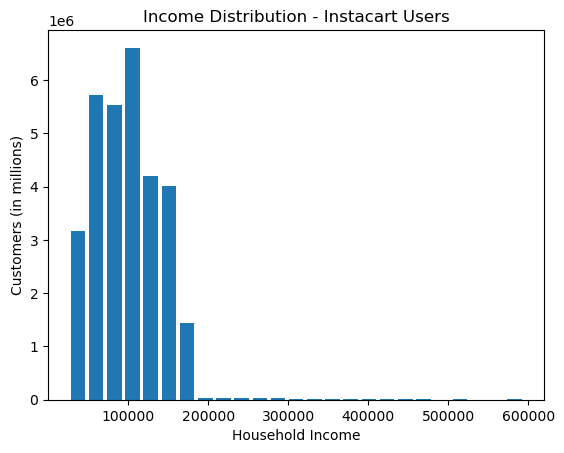

In [25]:
#Create histogram for income distribution 
hist1 = df['income'].plot.hist(bins = 25,rwidth=0.8)

plt.xlabel("Household Income")
plt.ylabel("Customers (in millions)")
plt.title("Income Distribution - Instacart Users")

In [26]:
#Export histrogram
hist1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_customers_income.png'))

#### Create profiles

In [27]:
#Create profile for 'Single Adult'
df.loc[(df['marital_status'] == 'single') & (df['age'] >= 18), 'profile'] = 'Single Adult'

/var/folders/2j/4cmd6qcd3j16bhj176m4p8vw0000gn/T/ipykernel_4818/1453797553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['marital_status'] == 'single') & (df['age'] >= 18), 'profile'] = 'Single Adult'


In [28]:
#Check results due to warning message
df['profile'].value_counts()

Single Adult    5094410
Name: profile, dtype: int64

In [29]:
#Create profile for small families (1 dependant) with low incomes (less than $100,000)
df.loc[(df['number_of_dependants'] == 1) & (df['income'] < 100000), 'profile'] = 'Low Income Small Family'

In [30]:
#Create profile for medium families (2 dependants) with low incomes (less than $100,000)
df.loc[(df['number_of_dependants'] == 2) & (df['income'] < 100000), 'profile'] = 'Low Income Medium Family'

In [31]:
#Create profile for large families (3 or more dependants) with low incomes (less than $100,000)
df.loc[(df['number_of_dependants'] >= 3) & (df['income'] < 100000), 'profile'] = 'Low Income Large Family'

In [32]:
#Create profile for small families (1 dependant) with high incomes (greater or equal to $100,000)
df.loc[(df['number_of_dependants'] == 1) & (df['income'] >= 100000), 'profile'] = 'High Income Small Family'

In [33]:
#Create profile for medium families (2 dependants) with high incomes (greater or equal to $100,000)
df.loc[(df['number_of_dependants'] == 2) & (df['income'] >= 100000), 'profile'] = 'High Income Medium Family'

In [34]:
#Create profile for large families (3 or more dependants) with high incomes (greater or equal to $100,000)
df.loc[(df['number_of_dependants'] >= 3) & (df['income'] >= 100000), 'profile'] = 'High Income Large Family'

In [35]:
#Create profile for retired customers (age 65 and older) with low incomes (less than $100,000)
df.loc[(df['age'] >= 65) & (df['income'] < 100000), 'profile'] = 'Low Income Retired'

In [36]:
#Create profile for retired customers (age 65 and older) with low incomes (greater or equal to $100,000)
df.loc[(df['age'] >= 65) & (df['income'] >= 100000), 'profile'] = 'High Income Retired'

In [37]:
#Create profile for young parents (age 30 and younger)
df.loc[(df['number_of_dependants'] > 0) & (df['age'] < 30), 'profile'] = 'Young Parent'

In [38]:
#Examine departments
df_dep = pd.read_csv(r'/Users/anfran/Documents/Instacart Basket Analysis/02 Data/Original Data/departments.csv', index_col = False)

In [39]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [40]:
#Create profile for customers who purchase alcohol (department 5)
df.loc[(df['department_id'] == 5), 'profile'] = 'Purchases Alcohol'

In [41]:
#Create profile for customers who purchase baby products (department 18)
df.loc[(df['number_of_dependants'] > 0) & (df['department_id'] == 18), 'profile'] = 'Purchases Baby Products'

In [42]:
#Group all other customers in 'other'
df['profile'] = df['profile'].fillna('Other')

/var/folders/2j/4cmd6qcd3j16bhj176m4p8vw0000gn/T/ipykernel_4818/2987746377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profile'] = df['profile'].fillna('Other')


In [43]:
#Check results of 'profile'
df['profile'].value_counts(dropna = False)

High Income Retired          5657112
Single Adult                 5069442
Young Parent                 4291137
Low Income Retired           2421427
Low Income Large Family      2138479
Low Income Medium Family     2134471
Low Income Small Family      2117119
High Income Large Family     2042150
High Income Small Family     2035769
High Income Medium Family    1985174
Other                         620593
Purchases Baby Products       307064
Purchases Alcohol             144627
Name: profile, dtype: int64

([<matplotlib.axis.XTick at 0x7f9f86822c40>,
 [Text(0, 0, 'Low Income\nSmall Family'),
  Text(1, 0, 'High Income\nRetired'),
  Text(2, 0, 'Young\nParent'),
  Text(3, 0, 'Low Income\nRetired'),
  Text(4, 0, 'Low Income\nLarge Family'),
  Text(5, 0, 'Low Income\nMedium Family'),
  Text(6, 0, 'High Income\nLarge Family'),
  Text(7, 0, 'High Income\nSmall Family'),
  Text(8, 0, 'High Income\nMedium Family'),
  Text(9, 0, 'Single Adult'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Purchases\nBaby Products'),
  Text(12, 0, 'Purchases\nAlcohol')])

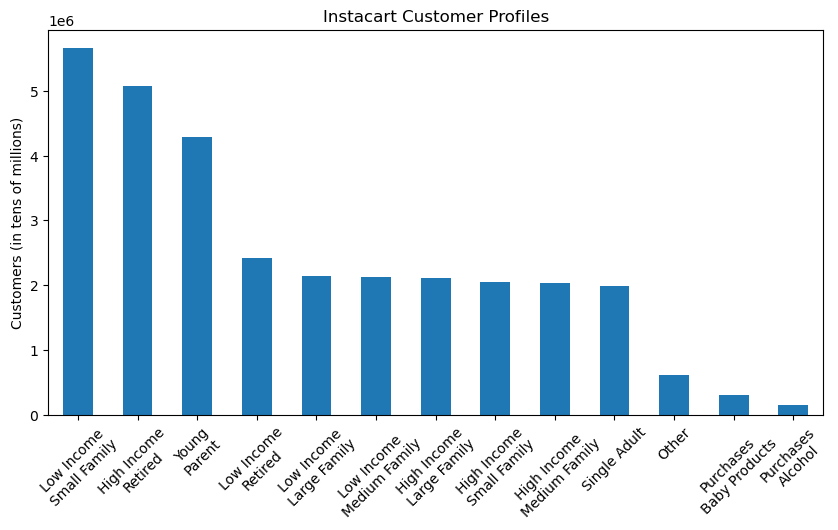

In [44]:
#Create bar chart showing profile distribution
bar = df['profile'].value_counts().plot.bar(rot=45, figsize = (10,5))
plt.ylabel("Customers (in tens of millions)")
plt.title ("Instacart Customer Profiles")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['Low Income\nSmall Family','High Income\nRetired','Young\nParent',
            'Low Income\nRetired','Low Income\nLarge Family','Low Income\nMedium Family',
            'High Income\nLarge Family','High Income\nSmall Family','High Income\nMedium Family',
            'Single Adult','Other','Purchases\nBaby Products','Purchases\nAlcohol'])

In [45]:
#Export Bar Chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_customer_profile.png'))

### Question 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [46]:
#Calculate mode for 'profile' column
print(df.groupby('profile').agg(lambda x:x.value_counts().index[0]))

                           order_id  user_id  order_number  \
profile                                                      
High Income Large Family    1564244   108187             1   
High Income Medium Family    604218   175294             1   
High Income Retired         2716231   201268             1   
High Income Small Family     653887   127158             1   
Low Income Large Family     2648316    33731             1   
Low Income Medium Family    1384519    57546             1   
Low Income Retired          2660847    17738             1   
Low Income Small Family     2753324   137629             1   
Other                        790903   129928             1   
Purchases Alcohol           2691644   148280             1   
Purchases Baby Products     2933894    84092             3   
Single Adult                  77151   186704             1   
Young Parent                2621625    60694             1   

                           orders_day_of_week  order_hour_of_day  \
p

In [47]:
#Aggregate max, mean, and min variables on a customer-profile level for 'prices' and 'days_since_prior_order'
df.groupby('profile').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order       \
                               mean  min   max                   mean  min   
profile                                                                      
High Income Large Family   7.955469  1.0  25.0          528458.164937  0.0   
High Income Medium Family  7.963150  1.0  25.0          537655.791162  0.0   
High Income Retired        7.955848  1.0  25.0          534760.025924  0.0   
High Income Small Family   7.954521  1.0  25.0          534122.857597  0.0   
Low Income Large Family    7.638470  1.0  25.0          542405.136893  0.0   
Low Income Medium Family   7.621694  1.0  25.0          540650.050287  0.0   
Low Income Retired         7.424334  1.0  25.0          546621.800098  0.0   
Low Income Small Family    7.638257  1.0  25.0          539923.132885  0.0   
Other                      7.796151  1.0  25.0          525201.306857  0.0   
Purchases Alcohol          8.150699  1.0  15.0          674848.678380  0.0   
Purchases Baby Products    7.647681  1.0  15.0          450892.457077  0.0   
Single Adult               7.782683  1.0  25.0          536645.183287  0.0   
Young Parent               7.785050  1.0  25.0          533884.990705  0.0   

                                      
                                 max  
profile                               
High Income Large Family   9999999.0  
High Income Medium Family  9999999.0  
High Income Retired        9999999.0  
High Income Small Family   9999999.0  
Low Income Large Family    9999999.0  
Low Income Medium Family   9999999.0  
Low Income Retired         9999999.0  
Low Income Small Family    9999999.0  
Other                      9999999.0  
Purchases Alcohol          9999999.0  
Purchases Baby Products    9999999.0  
Single Adult               9999999.0  
Young Parent               9999999.0

In a previous exercise, I changed days_since_prior_order NaN values to '9999999' to show that these were new customers. This is now contaminating the mean for days_since_prior_order. I will change the values back to '0'. 

In [48]:
#Change '9999999'to '0' in 'days_since_prior_order' column
df['days_since_prior_order'].replace(to_replace=9999999, value = 0, inplace = True)

/var/folders/2j/4cmd6qcd3j16bhj176m4p8vw0000gn/T/ipykernel_4818/3017200084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_prior_order'].replace(to_replace=9999999, value = 0, inplace = True)


In [49]:
#Check value counts
df['days_since_prior_order'].value_counts()

7.0     3417439
30.0    2674369
6.0     2478763
0.0     2099294
5.0     2097483
4.0     2057523
8.0     1893814
3.0     1859814
2.0     1451368
9.0     1190720
14.0     991305
10.0     943601
1.0      931690
13.0     822986
11.0     797928
12.0     750735
15.0     645987
16.0     441608
21.0     420431
17.0     365616
20.0     361307
18.0     336197
19.0     319029
22.0     292484
28.0     236454
23.0     212814
27.0     190387
24.0     182811
25.0     169829
26.0     167175
29.0     163603
Name: days_since_prior_order, dtype: int64

In [50]:
#Aggregate max, mean, and min variables on a customer-profile level for 'prices' and 'days_since_prior_order'
df.groupby('profile').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order       \
                               mean  min   max                   mean  min   
profile                                                                      
High Income Large Family   7.955469  1.0  25.0              10.258524  0.0   
High Income Medium Family  7.963150  1.0  25.0              10.278341  0.0   
High Income Retired        7.955848  1.0  25.0              10.192884  0.0   
High Income Small Family   7.954521  1.0  25.0              10.248914  0.0   
Low Income Large Family    7.638470  1.0  25.0              10.339465  0.0   
Low Income Medium Family   7.621694  1.0  25.0              10.292426  0.0   
Low Income Retired         7.424334  1.0  25.0              10.290586  0.0   
Low Income Small Family    7.638257  1.0  25.0              10.220246  0.0   
Other                      7.796151  1.0  25.0              10.130986  0.0   
Purchases Alcohol          8.150699  1.0  15.0               9.331370  0.0   
Purchases Baby Products    7.647681  1.0  15.0               9.298664  0.0   
Single Adult               7.782683  1.0  25.0              10.238464  0.0   
Young Parent               7.785050  1.0  25.0              10.222570  0.0   

                                 
                            max  
profile                          
High Income Large Family   30.0  
High Income Medium Family  30.0  
High Income Retired        30.0  
High Income Small Family   30.0  
Low Income Large Family    30.0  
Low Income Medium Family   30.0  
Low Income Retired         30.0  
Low Income Small Family    30.0  
Other                      30.0  
Purchases Alcohol          30.0  
Purchases Baby Products    30.0  
Single Adult               30.0  
Young Parent               30.0

Now the mean is more accurate. 

### Question 8 - Compare your customer profiles with regions and departments.

In [51]:
#Create crosstab for 'profile' and 'region'
crosstab3 = pd.crosstab(df['profile'], df['region'], dropna = False)

In [52]:
crosstab3

region,Midwest,Northeast,South,West
profile,,,,
High Income Large Family,485416,364071,661519,531144
High Income Medium Family,486220,356831,655503,486620
High Income Retired,1318038,1028804,1864407,1445863
High Income Small Family,498344,368001,647276,522148
Low Income Large Family,470283,370059,732654,565483
Low Income Medium Family,487254,373313,733356,540548
Low Income Retired,559320,436175,803019,622913
Low Income Small Family,498397,372085,705398,541239
Other,146556,99468,218448,156121


In [53]:
#Create crosstab for 'profile' and 'department_id'
crosstab4 = pd.crosstab(df['profile'], df['department_id'], dropna = False)

In [54]:
crosstab4

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
High Income Large Family,145056,2350,76136,625005,0,17516,164051,7072,57922,1873,...,49276,121939,43198,71338,351720,46993,0,160777,67033,4125
High Income Medium Family,141362,2057,76676,596916,0,16948,161748,5853,56156,1976,...,48451,120677,42253,69347,343414,45862,0,156325,66781,4225
High Income Retired,399406,6312,211418,1719488,0,48512,454001,18625,158994,5925,...,136237,338609,118771,195602,972729,128236,18091,449325,187730,11892
High Income Small Family,143728,2305,76035,620054,0,17540,164203,5826,56923,2230,...,49352,123827,44057,71378,350909,47248,0,161443,65651,4624
Low Income Large Family,147453,2279,77462,628556,0,17551,186410,5935,56534,2430,...,44343,122508,48724,67985,355937,50472,0,216939,71310,4793
Low Income Medium Family,146480,2390,75766,629168,0,17297,189057,6664,54366,2757,...,42528,120683,48375,66900,355617,49185,0,223481,69720,4531
Low Income Retired,164844,2634,84579,688616,0,18687,230019,6490,58322,3020,...,44913,133774,56525,71907,395343,58394,7801,279224,77469,5023
Low Income Small Family,143609,2319,75664,616807,0,17568,188554,6086,55048,2426,...,42901,121641,48197,66699,360711,49304,0,216802,68615,4218
Other,42853,687,23317,182002,0,5301,52237,1259,16955,582,...,13290,36156,14104,19525,103802,13432,8459,55948,21381,1081


([<matplotlib.axis.XTick at 0x7f9b103e15e0>,
 [Text(0, 0, 'High Income\nLarge Family'),
  Text(1, 0, 'High Income\nMedium Family'),
  Text(2, 0, 'High Income\nRetired'),
  Text(3, 0, 'High Income\nSmall Family'),
  Text(4, 0, 'Low Income\nLarge Family'),
  Text(5, 0, 'Low Income\nMedium Family'),
  Text(6, 0, 'Low Income\nSmall Family'),
  Text(7, 0, 'Low Income\nRetired'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Purchases\nAlcohol'),
  Text(10, 0, 'Purchases\nBaby Products'),
  Text(11, 0, 'Single Adult'),
  Text(12, 0, 'Young\nParent')])

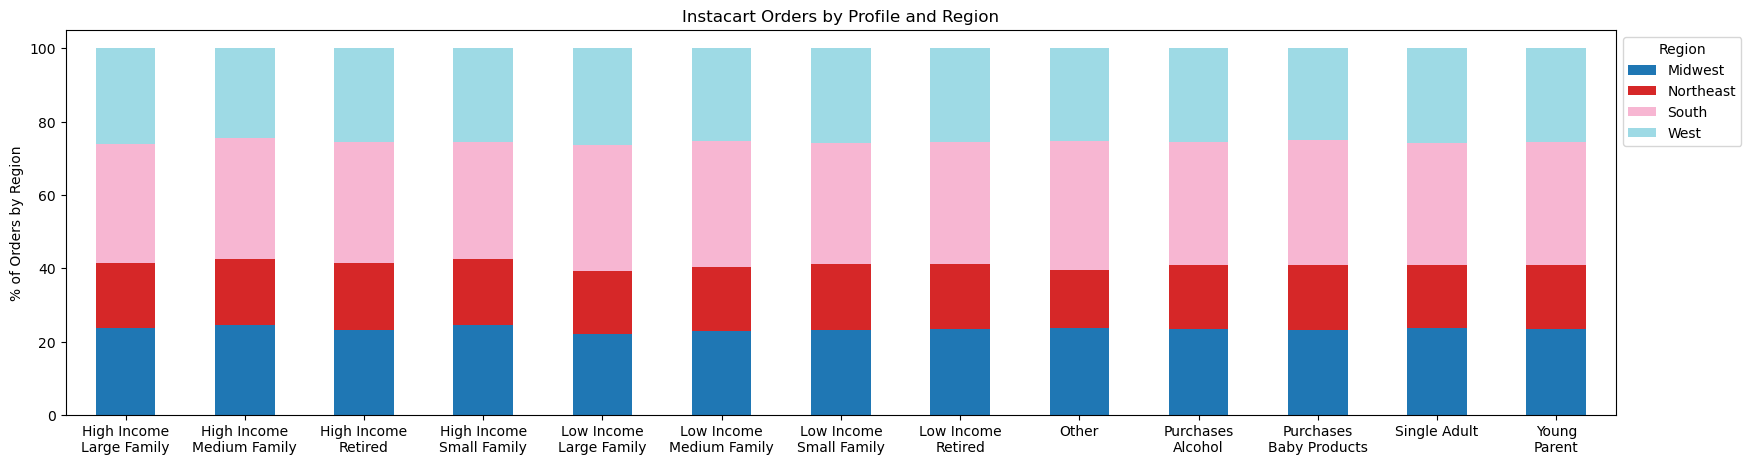

In [55]:
#Create stacked bar chart to display region results
stackedbar = crosstab3.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of Orders by Region")
plt.title ("Instacart Orders by Profile and Region")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['High Income\nLarge Family','High Income\nMedium Family','High Income\nRetired',
                                           'High Income\nSmall Family','Low Income\nLarge Family','Low Income\nMedium Family',
                                           'Low Income\nSmall Family','Low Income\nRetired','Other','Purchases\nAlcohol',
                                           'Purchases\nBaby Products','Single Adult','Young\nParent' ]) 

In [56]:
#Export Stacked Bar Chart
stackedbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_chart_customer_profile_region.png'))

([<matplotlib.axis.XTick at 0x7f9b1031bdf0>,
 [Text(0, 0, 'High Income\nLarge Family'),
  Text(1, 0, 'High Income\nMedium Family'),
  Text(2, 0, 'High Income\nRetired'),
  Text(3, 0, 'High Income\nSmall Family'),
  Text(4, 0, 'Low Income\nLarge Family'),
  Text(5, 0, 'Low Income\nMedium Family'),
  Text(6, 0, 'Low Income\nSmall Family'),
  Text(7, 0, 'Low Income\nRetired'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Purchases\nAlcohol'),
  Text(10, 0, 'Purchases\nBaby Products'),
  Text(11, 0, 'Single Adult'),
  Text(12, 0, 'Young\nParent')])

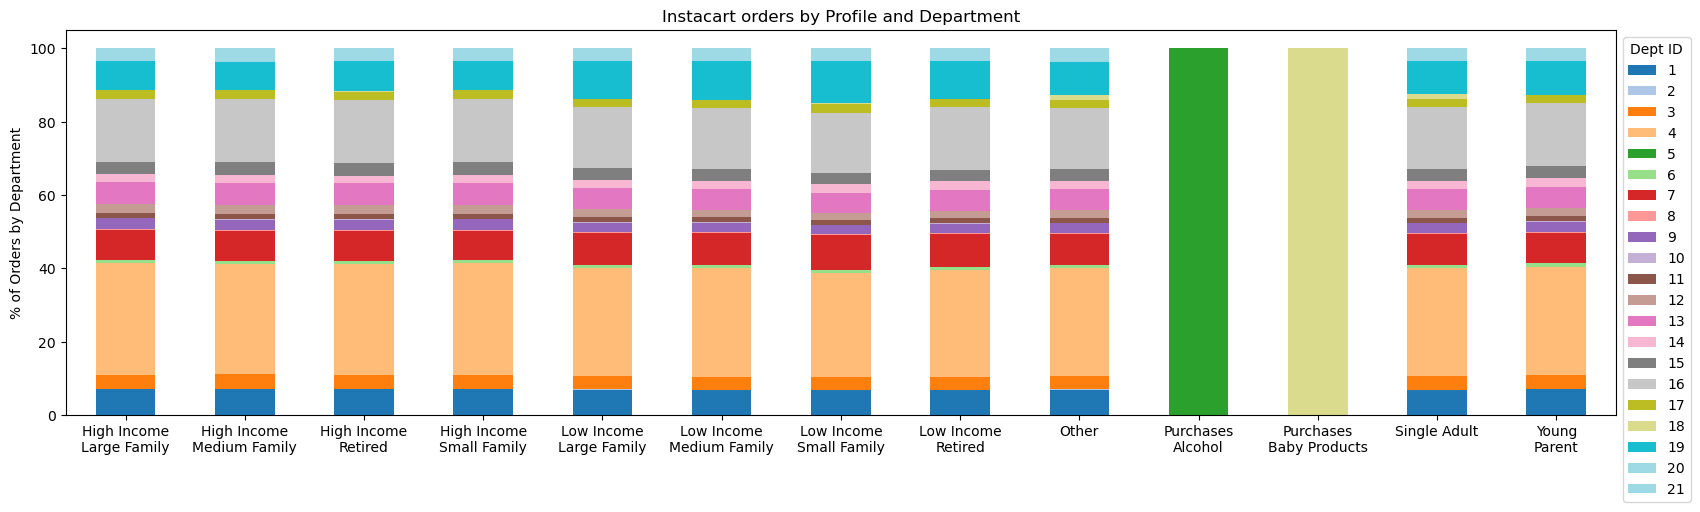

In [57]:
#Create stacked bar chart to display 'department_id' results
stackedbar2 = crosstab4.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20').legend(title="Dept ID", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of Orders by Department")
plt.title ("Instacart orders by Profile and Department")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['High Income\nLarge Family','High Income\nMedium Family','High Income\nRetired',
                                           'High Income\nSmall Family','Low Income\nLarge Family','Low Income\nMedium Family',
                                           'Low Income\nSmall Family','Low Income\nRetired','Other','Purchases\nAlcohol',
                                           'Purchases\nBaby Products','Single Adult','Young\nParent' ]) 

In [58]:
#Export Stacked Bar Chart
stackedbar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_chart_customer_profile_department.png'))

### Question 9 - Produce suitable charts to illustrate your results and export them in your project folder.

In [59]:
#Create a crosstab for 'regions' and 'loyalty_flag'
crosstab5 = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [60]:
crosstab5

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 1.0, 'Instacart Orders by Loyalty Flag and Region ')

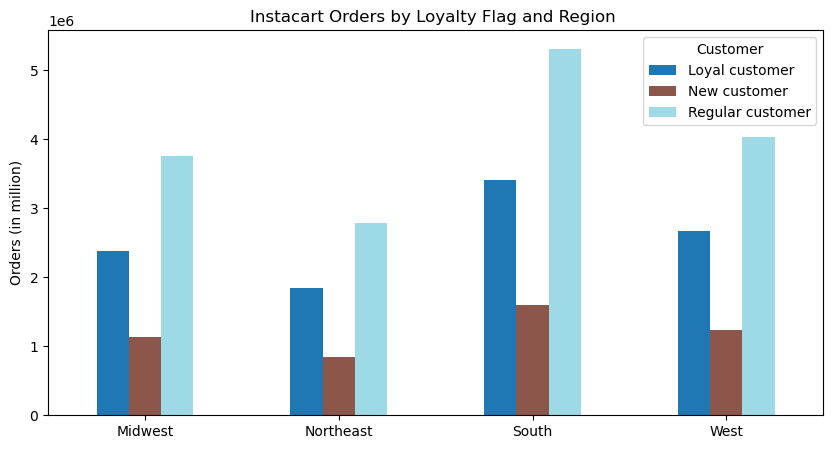

In [61]:
#Create bar chart that shows results
bar2 = crosstab5.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab20').legend(title="Customer", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders (in million)")
plt.title ("Instacart Orders by Loyalty Flag and Region ")

In [62]:
#Export bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_loyalty_flag_region.png'))

In [63]:
#Create crosstab for 'region' and 'Spending_flag'
crosstab6 = pd.crosstab(df['region'], df['Spending_flag'], dropna = False)

In [64]:
crosstab6

Spending_flag,High spender,Low spender
region,,
Midwest,148784,7112729
Northeast,103140,5361545
South,199618,10111521
West,152412,7774815


* This information doesn't seem to be helpful. Perhaps look at the 'price_range_loc' instead. 

In [65]:
#Create crosstab for 'region' and 'price_range_loc'
crosstab7 = pd.crosstab(df['region'], df['price_range_loc'], dropna = False)

In [66]:
crosstab7

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


This information seems to be more helpful. 

Text(0.5, 1.0, 'Instacart Orders by Product Price Range and Region ')

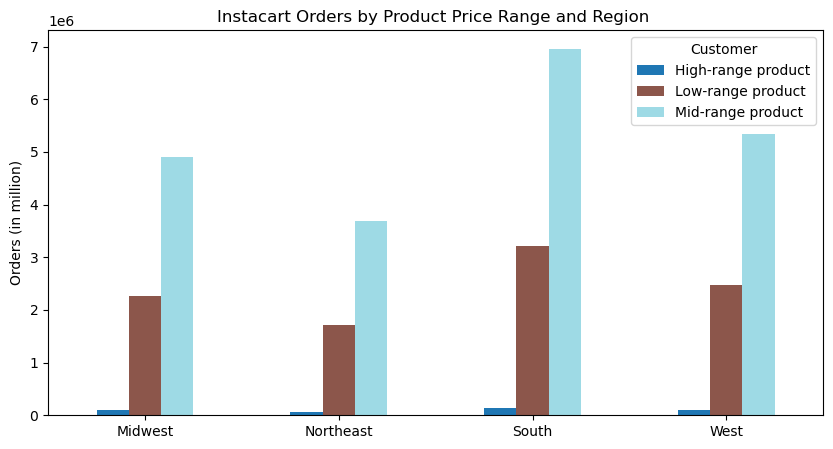

In [67]:
#Create bar chart showing results
bar3 = crosstab7.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab20').legend(title="Customer", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders (in million)")
plt.title ("Instacart Orders by Product Price Range and Region ")

In [68]:
#Export bar chart
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_price_range_region.png'))

Text(0.5, 1.0, 'Income for Customer Profiles')

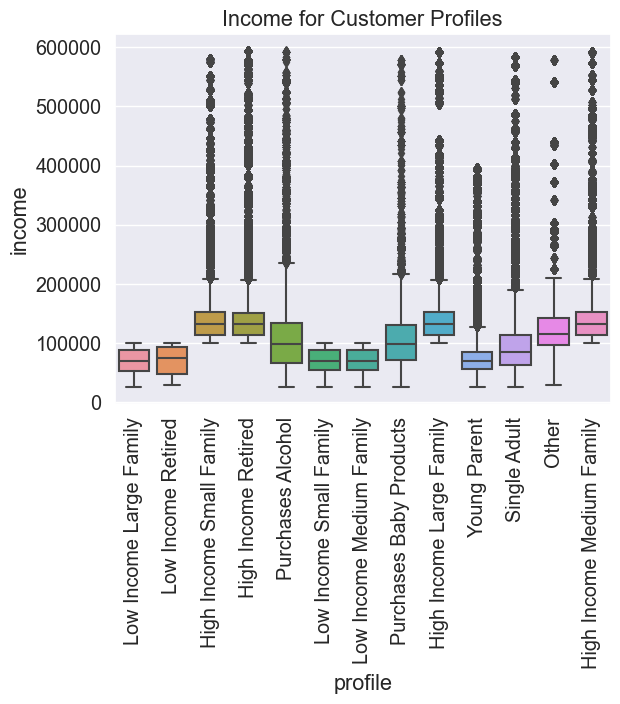

In [69]:
#Create Box Plot for 'income' and 'profile'
sns.set(font_scale=1.3)
boxplot = sns.boxplot(x='profile',y='income',data=df)
plt.xticks(rotation=90)
plt.title ("Income for Customer Profiles")

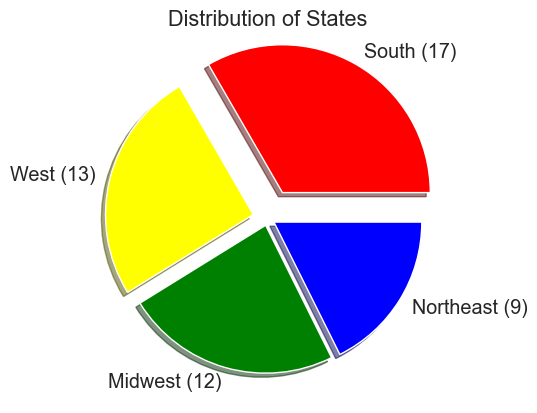

In [71]:
#Create pie chart to show customer distribution in 'region'

y = np.array([17, 13, 12, 9])
mylabels = ["South (17)", "West (13)", "Midwest (12)", "Northeast (9)"]
myexplode = [0.2, 0.1, 0.05, 0.05]
mycolors = ["Red", "Yellow", "Green", "Blue"]
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, shadow = True)
plt.xlabel("")
plt.ylabel("")
plt.title ("Distribution of States")
plt.show() 

In [72]:
#Export pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_states_region.png'))

<Figure size 640x480 with 0 Axes>

In [74]:
#Export to pickle
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_combined_high_activity_4.10.pkl'))